<a href="https://colab.research.google.com/github/mabrandes/hello-world/blob/main/Week_5_bk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
from scipy.integrate import dblquad, quad, nquad
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving image_363.png to image_363.png


# Task 1

CMOS camera‘s are widely used for monitoring the temperature and shapeof the melt pool in PBF. They are able to detect visible and near-infrared wavelength spectrum.

Suppose there is a camera installed in a PBF system for process monitoringthat can capture light in between wavelengths 200nm and 1100nm. A pixelin the camera sensor is saturated (ie. Reaches the maximum output signalvalue) at radiance intensity value of 10kW/sr.m2.  Since we would like tomeasure the temperature and thus shape, it is required to filter out somewavelength range by installing a band-width filter.

Laser travel speed = 800 mm/s\
Tboiling= 2650°C\
λlaser= 1070 nm


**Planck`s equation for black body radiation (Planck(T, wave\_length, emissivity):**

\
<font size="4">
$ B_\lambda(T,\lambda, \epsilon) = \frac{2hc^2\lambda^{-5}}{exp(\frac{hc}{k\lambda T}) - 1 } \epsilon_\lambda  $ 
</font>

B = spectral radiance as a function of temperature(K), wavelength and emissivity (W/sr-m²-nm)

c = speed of light (2.997925e+8 m/s)

k = Boltzman constant (1.381e-23 J/K)

h = Planck's constant (6.626e-34 Js)

$ \lambda $ = wavelength (nm)

T = temperature (K)

$ \epsilon_\lambda $ = 0.3 @ all temperatures

**Intensity function (Planck\_intensity(lambda\_min, lambda\_max, temperature, emissivity=0.3):** 

\
<font size="4">
$ I_\lambda(T,\lambda, \epsilon) = \int_{\lambda_{min}}^{\lambda_{max}} B_\lambda(T,\lambda, \epsilon) $
</font> 

I = radiance intensity as a function of temperature, wavelength range and emissivity (W/sr.m².nm)

$ λ_{laser} $: 1070 nm 

Inconel625  $ T_{boiling}: 2650°C $


**Questions:**

1. What is the minimum sampling rate (frequency(Hz)) of the camerain order to capture the micro-structural indications bigger than 50microns ?

2. Describe the basic principle of temperature measurement by a camera.

3. Describe 3 different radiation types that are observed during PBF process.

4. Propose a wavelength range that outside of the range should be filtered out

Step[1]: First, complete the Planck() function and plot the black bodycurves by running the next cell in the given temperature andwavelength range.  You can choose different temperature andwavelength values to plot the related black body curves. This is only for observing the black body curve response according to the temperature

Step[2]: Radiance intensity is defined by the area under the related temperature curve. Planck_intensity() function calculates the area under the given temperature curve by integrating over a given wavelength range. By using different wavelength inputs to Planck_intensity() function, propose the widest possible wavelength range (minimum and maximum wavelength values for filtering) so that resulting intensity will not saturate the camera.

Hint:
- Remember that during the proces, temperature is expected to reach boiling temperature of the alloy.
- Answer of this question will be the inputs used for Planck_intensity() function and exact values are not definite.

In [ ]:
def Planck(T, wave_length, emissivity):

    '''
    Arguments:
    T: Material temperature (°C)
    wave_length: wave length of the radiation
    emissivity: emissivity coefficiant of the material (for non-black bodies: 0 < emissivity < 1)
    
    Returns:
    intenstiy: intensity of the emmited radiation in the given wavelength from a material in a given temperature
    '''
    
    c = 2.997925e+8 # m/s
    k = 1.381e-23 # J/K
    h = 6.626e-34 # Js

    Beta = (h*c)/(k*wave_length*T)
    
    return ###### fill the remainder of the Planck`s formula here

In [ ]:
'''
This cell is for plotting black body curves in various temperatures. 
Change min_temp, max_temp, min_wave, max_wave values to obtain the curve in different temperature and wavelength ranges 
'''

min_temp = 300  #K
max_temp = 3000 #K

min_wave = 100 # n
max_wave = 2000  # nm

temperatures = np.arange(min_temp,max_temp,(max_temp-min_temp)/30)

wave_lengths = np.arange(min_wave,max_wave,(max_wave-min_wave)/100)

fig=plt.figure(figsize=(16, 10))
for i in temperatures:
    plt.plot(wave_lengths, Planck_i(wave_lengths,i, 0.3), label="{}K".format(int(i)))
plt.ylabel('Spectral radiance [W/str m^2 nm)]')
plt.xlabel('Wavelength [nm]')
plt.legend()

In [ ]:
def Planck_intensity(lambda_min, lambda_max, temperature, emissivity=0.3):
    
    '''
    Arguments:
    lambda_min: wavelength lower threshold
    lambda_max: wavelength higher threshold
    temperature: Temperature (K)
    emissivity: emissivity coefficiant of the material (for non-black bodies: 0 < emissivity < 1)
    
    Returns:
    intenstiy: intensity of the emmited radiation in the given wavelength range and temperature (W/sr-m²)
    '''

    ans, err = quad(Planck, lambda_min, lambda_max, args=(temperature, emissivity))

    print("radiance intensity:", round(ans/1000,3), "kW/str m^2")

    return

In [ ]:
Planck_intensity(#lower wavelength threshold, upper wavelength threshold, temperature, emissivity)

# Solution

## Question 1

What is the minimum sampling rate (frequency(Hz)) of the camerain order to capture the micro-structural indications bigger than 50microns ?

In [ ]:
v = 800 #mm/s
min_distance = 0.05 #mm

sampling_ratio = v / min_distance

sampling_ratio # 1/s

16000.0

## Question 2

Describe the basic principles of temperature measurement by a camera.

All matters emits radiation proportional to their temperature. Photo-sensitive sensors can be used to capture the radiation and quantify theradiance intensity. By using the relationship between the temperatureand radiance intensity described by Planck‘s law, we can calculate thetemperature of the material.

## Question 3

Describe 3 different radiation types that are observed during PBF pro-cess.

(a) Plasma radiation, mostly in the visible range.

(b) Reflected monochromatic laser radiation, same wavelength as thelaser source.

(c) Thermal radiation, in all wavelengths.

## Question 4

In [ ]:
def Planck(wave_length, T, emissivity = 0.3):

    '''
    Arguments:
    T: Material temperature (°C)
    wave_length: wave length of the radiation
    emissivity: emissivity coefficiant of the material (for non-black bodies: 0 < emissivity < 1)
    
    Returns:
    intenstiy: intensity of the emmited radiation in the given wavelength from a material in a given temperature
    '''
    
    c = 2.997925e+8 # m/s
    k = 1.381e-23 # J/K
    h = 6.626e-34 # Js

    Beta = (h*c)/(k*(wave_length*1e-9)*T)
    
    return emissivity*((2*h*c**2*(wave_length*1e-9)**-5)/(np.exp(Beta)-1)*1e-9)

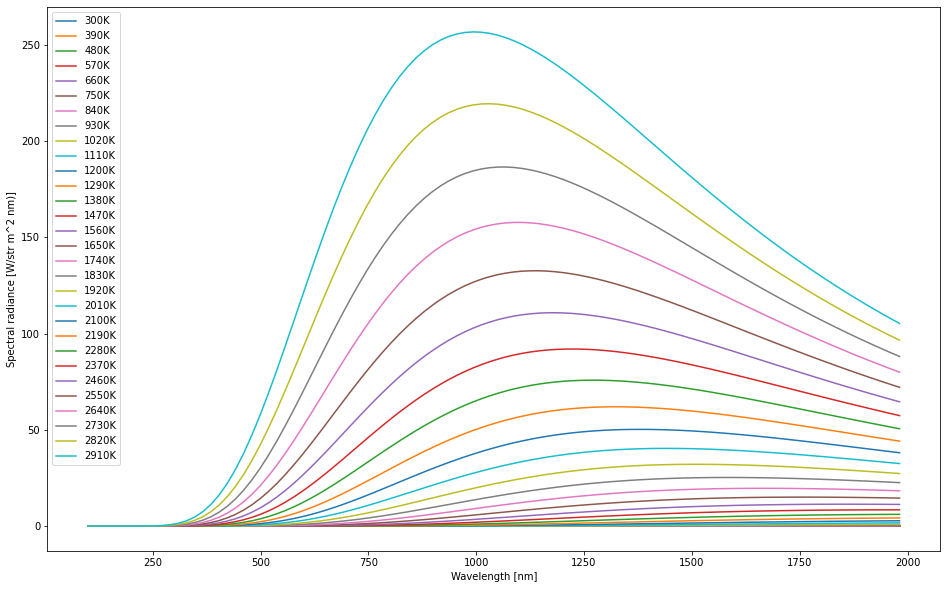

In [ ]:
'''
This cell is for plotting black body curves in various temperatures. 
Change min_temp, max_temp, min_wave, max_wave values to obtain the curve in different temperature and wavelength ranges 
'''

min_temp = 300  #K
max_temp = 3000 #K

min_wave = 100 # nm
max_wave = 2000  # nm

temperatures = np.arange(min_temp,max_temp,(max_temp-min_temp)/30)

wave_lengths = np.arange(min_wave,max_wave,(max_wave-min_wave)/100)

fig=plt.figure(figsize=(16, 10))
for i in temperatures:
    plt.plot(wave_lengths, Planck(wave_lengths,i), label="{}K".format(int(i)))
plt.ylabel('Spectral radiance [W/str m^2 nm)]')
plt.xlabel('Wavelength [nm]')
plt.legend()

In [ ]:
def Planck_intensity(lambda_min, lambda_max, temperature, emissivity=0.3):
    
    '''
    Arguments:
    lambda_min: wavelength lower threshold
    lambda_max: wavelength higher threshold
    temperature: Temperature (K)
    emissivity: emissivity coefficiant of the material (for non-black bodies: 0 < emissivity < 1)
    
    Returns:
    intenstiy: intensity of the emmited radiation in the given wavelength range and temperature (W/sr-m²)
    '''

    ans, err = quad(Planck, lambda_min, lambda_max, args=(temperature, emissivity))

    print("radiance intensity:", round(ans/1000,3), "kW/str m^2")

    return

In [ ]:
Planck_intensity(800, 840, 2923, 0.3)

radiance intensity: 9.563 kW/str m^2


# Task 2

National Institute of Standardization and Testing (NIST) has been pub-lished in-situ melt pool images acquired by an co-axially positioned camerawith the laser beam. 

•Powder material: INCONEL 625 (Ni-Cr alloy)

•Laser power: 195 W

•Laser travel speed: 800 mm/s

material properties for INCONEL 625:

$\rho$: 8440 #kg/(m^3) density

$C_p$: 560 #J/(kg*K) heat capacity

$\lambda$ = 21.3 #W/(m*K) thermal conductivity

We would like to calculate the theoretical shape of the melt pool for thegiven example by using the Rosenthal’s 3D the temperature distributionas practiced in task 1 of exercise week 2.

## Question 1:

What are the following dimensions of the meltpool according to the Rosenthal`s 3D model ?

•Width

•Length

•Area

Step [1]:Define the material properties into the cell below 

hint: formula of thermal diffusivity: $\alpha = \lambda/(\rho*C_p)$

Step [2]: run the meltpool_plotter(v,Q) function with the process related inputs given above and obtain the meltpool dimensions and the shape.


In [ ]:
# Material Data for INCONEL 625(inco625)
alpha_inco625 = ####### Thermal diffusivity (m**2/s)
lmbda_inco625 = ###### Thermal conductivity (J/(m*s*K))
Tm_inco625 = ###### Melting Temperature (°C)

In [ ]:
def rosenthal(x, y, z, v, Q, T0, lmbda, alpha):
    '''
    Arguments:
    x, y, z: position [m], given as numpy-array or single number
    v: velocity of heat source [m/s]
    Q: deposited energy of heat source
    T0: initial temperature of material
    lmbda: thermal conductivity of material [J/(m*s*K)]
    alpha: thermal diffusivity of material [m**2/s]
    
    Returns:
    T: temperature [deg_c], given in same format as positions
    '''
    
    R = (x**2+y**2+z**2)**0.5
    T = T0 + Q/(2*math.pi*lmbda) * np.exp(-v*(x+R)/(2*alpha)) / (R + 1e-12)
    return T

In [ ]:
def meltpool_plotter(v, Q):

  '''
  Arguments:
  v: laser velocity (m/s)
  Q: laser power (W)
  
  Returns:
  Meltpool dimensions and the shape plot according to the Rosenthal`s 3d meltpool model
  '''

  v = 800e-3
  Q = 195

  # This code will return a 10000x10000 square numpy matrix with the temperature values at X and Y

  xmin = -0.1
  xmax = 0.1

  # populate the matrix with temperature values calculated by rosenthal equation

  x = y = np.arange(xmin, xmax, (xmax-xmin)/10000)
  z = 0.00001
  X, Y = np.meshgrid(x, y)
  T0 = 25
  T = rosenthal(X, Y, z, v, Q, T0, lmbda_inco625, alpha_inco625)


  # Melt pool shape calculation

  is_melted = T > Tm_inco625
  y_melt, x_melt = np.where(is_melted)
  length = x[x_melt.max()]- x[x_melt.min()]
  width = y[y_melt.max()]- y[y_melt.min()]
  area = (((xmax-xmin)/10000)**2) *is_melted.sum()
  print(f'length: {(length)*1e3:.2f}mm')
  print(f'width: {(width)*1e3:.2f}mm')
  print(f'area: {(area)*1e6:.2f}mm^2')

  # Plot the resulting meltpool contour

  fig = plt.figure()
  contour = plt.contour(X*100, Y*100, is_melted)
  plt.ylabel('y [cm]')
  plt.xlabel('x [cm]')
  plt.axis('equal')
  plt.xlim(x[x_melt.min()]*110, x[x_melt.max()]*120+0.01)
  plt.ylim(y[y_melt.min()]*110, y[y_melt.max()]*110)
  plt.show()

  return

# Solution

##Question 1

In [ ]:
# Material Data for INCONEL 625(inco625)
alpha_inco625 = 9.8  / 8440.0 / 410 # Thermal diffusivity (m**2/s)
lmbda_inco625 = 9.8 # Thermal conductivity (J/(m*s*K))
Tm_inco625 = 1320 # Melting Temperature °C

In [ ]:
def rosenthal(x, y, z, v, Q, T0, lmbda, alpha):
    '''
    Arguments:
    x, y, z: position [m], given as numpy-array or single number
    v: velocity of heat source [m/s]
    Q: deposited energy of heat source [W]
    T0: initial temperature of material
    lmbda: thermal conductivity of material [J/(m*s*K)]
    alpha: thermal diffusivity of material [m**2/s]
    
    Returns:
    T: temperature [deg_c], given in same format as positions
    '''
    R = (x**2+y**2+z**2)**0.5
    T = T0 + Q/(2*math.pi*lmbda) * np.exp(-v*(x+R)/(2*alpha)) / (R + 1e-12)
    return T

In [ ]:
def meltpool_plotter(v, Q):

  # This code will return a 10000x10000 square numpy matrix with the temperature values at X and Y

  xmin = -0.1
  xmax = 0.1

  # populate the matrix with temperature values calculated by rosenthal equation

  x = y = np.arange(xmin, xmax, (xmax-xmin)/10000)
  z = 0.00001
  X, Y = np.meshgrid(x, y)
  T0 = 25
  T = rosenthal(X, Y, z, v, Q, T0, lmbda_inco625, alpha_inco625)


  # Melt pool shape calculation

  is_melted = T > Tm_inco625
  y_melt, x_melt = np.where(is_melted)
  length = x[x_melt.max()]- x[x_melt.min()]
  width = y[y_melt.max()]- y[y_melt.min()]
  area = (((xmax-xmin)/10000)**2) *is_melted.sum()
  print(f'length: {(length)*1e3:.2f}mm')
  print(f'width: {(width)*1e3:.2f}mm')
  print(f'area: {(area)*1e6:.2f}mm^2')

  # Plot the resulting meltpool contour

  fig = plt.figure()
  contour = plt.contour(X*100, Y*100, is_melted)
  plt.ylabel('y [cm]')
  plt.xlabel('x [cm]')
  plt.axis('equal')
  plt.xlim(x[x_melt.min()]*110, x[x_melt.max()]*120+0.01)
  plt.ylim(y[y_melt.min()]*110, y[y_melt.max()]*110)
  plt.show()

  return

length: 2.42mm
width: 0.20mm
area: 0.44mm^2


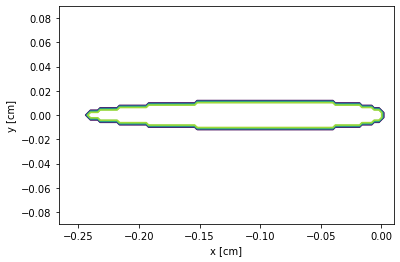

In [ ]:
meltpool_plotter(800e-3, 195)

#Task 3


Now, we would like to measure the dimensions of the melt pool by processing the meltpool image given in task 1.

Meltpool image is imported as a matrix with each value being a function of radiation intensity reading. Highest intensity value is 255, while the lowest is 0. We would like to calculate the geometrical properties of the meltpool (legth, width and area). For this, each number of pixels in the molten region will be counted and multiplied by the area represented by each pixel. First, we need to decide which pixels are in the melted region.the relationship between the camera signal and the radiant temperature is given below (temp_app_signal() is function of signal to obtain temperature, temp_app() is the invert of the same function). 

$ T_{app}(S) = \frac{c_2}{Aln(\frac{C}{S}+1)} - \frac{B}{A} - 273.15  $

$ T_{app} $ = appearent temperature

S = Camera signal output (pixel intensity)

$ c_{2} $ = 14338 #µm/K radiation constant

A = 0.2970599 #curve fit coefficient

B = 564.23278 #curve fit coefficient

C = 5.120179e+07 #curve fit coefficient

## Question 1:

What are the following dimensions of the meltpool according to the Rosenthal`s 3D model ?

•Width

•Length

•Area

Step[1]: Add the equation given above to the function temp_app_signal() and plot the signal-temperature curve by running the next cell. This plot represents the relationship between the image data and the material temperature.

Step[2]: Run the meltpool_calc() function to obtain the meltpool dimensions and the shape.

## Question 2:

Describe 5 reasons why the dimensions obtained measured in the captured meltpool image is different than the dimensions obtained in the theoretical meltpool model of Rosenthal.

In [ ]:
def temp_app_signal(signal):
    
    '''
    Arguments:
    signal: pixel intensity value
    
    Returns:
    Tapp: apperant temperature (°C)
    '''
    
    c2 = 14338 #µm/K radiation constant
    A = 0.2970599 #curve fit coefficient
    B = 564.23278 #curve fit coefficient
    C = 5.120179e+07 #curve fit coefficient
    
    Tapp = ####### write the function here
    
    return Tapp

In [ ]:
'''
This cell is only for visualization of the signal vs temperature relationship. 
After completing the temp_app_signal() function, run this cell to see the plot.
'''

dl = np.arange(1,255)
fig=plt.figure(figsize=(10, 5))

plt.plot(dl, temp_app_signal(dl))
plt.ylabel('Apparent Temperature (°C)')
plt.xlabel('Signal value (bits)')
plt.ylim(1100,2200)
plt.xlim(0,255)

In [ ]:
def meltpool_calc(Tm_inco625):
    
    '''
    Arguments:
    Tm_inco625: melting point of Inconel625 (°C)
    
    Returns:
    Meltpool area
    width, length
    raw meltpool image
    meltpool temperature field
    meltpool contour for the given melting temperature.
    '''
    
    img=cv2.imread('image_363.png',0)

    #change all 0 values to 1 for computational convenience
    indices_zero = img == 0
    img[indices_zero] = 1

    #get the temperature field with integers
    img_temp = np.rint(temp_app_signal(img))

    #plot raw image
    plot1 = plt.figure(1)
    plt.imshow(img)
    plt.colorbar().set_label("intensity(bits)")
    plt.title("raw meltpool image")
    plt.ylabel('y [pixel]')
    plt.xlabel('x [pixel]')
    plt.axis('equal')

    #plot temperature field
    plot2 = plt.figure(2)
    plt.imshow(img_temp)
    plt.colorbar().set_label("Temperature(°C)")
    plt.title("Meltpool temperature field")
    plt.ylabel('y [pixel]')
    plt.xlabel('x [pixel]')
    plt.axis('equal')

    #calculate the signal correspondence of the melting temperature
    c2 = 14338 #µm/K
    A = 0.2970599 #coefficient
    B = 564.23278 #coefficient
    C = 5.120179e+07 #coefficient
    signal = C/(np.exp((c2/((Tm_inco625+B/A+273.15)*A)))-1)
    
    #plot meltpool contour
    plot3 = plt.figure(3)
    ret, thresh = cv2.threshold(img, signal, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_temp, contours, -1, (200), 1)
    plt.imshow(img_temp, vmin=917, vmax=img_temp.max())
    plt.colorbar().set_label("Temperature(°C)")
    plt.title("Temperature field with meltpool contour")
    plt.ylabel('y [pixel]')
    plt.xlabel('x [pixel]')
    plt.axis('equal')

    #dimensional calcualtion
    is_melted = img_temp > Tm_inco625
    y_melt, x_melt = np.where(is_melted)
    length = 8e-6*(x_melt.max() - x_melt.min())
    width = 8e-6*(y_melt.max() - y_melt.min())
    area = is_melted.sum()*8e-12
    print(f'length: {(length)*1e3:.2f}mm')
    print(f'width: {(width)*1e3:.2f}mm')
    print(f'area: {(area)*1e6:.4f}mm^2')
    
    return

In [ ]:
meltpool_calc(#####)

Shape is similar with the findings of the paper below:

![image.png](attachment:image.png)

[Promoppatum, P., Yao, S. C., Pistorius, P. C., & Rollett, A. D. (2017). A Comprehensive Comparison of the Analytical and Numerical Prediction of the Thermal History and Solidification Microstructure of Inconel 718 Products Made by Laser Powder-Bed Fusion. Engineering, 3(5), 685–694. https://doi.org/10.1016/J.ENG.2017.05.023]

#### Question

In order to employ Rosenthal's model for the problem, we need to make following assumptions:

- Laser to material energy transfer efficiency is 100%
- All material properties are assumed to be in room temperature conditions
- thermal conductivitiy and diffusivity of the powder material is the same with the solid material
- No heat accumulation between layers

# Task 2

CMOS cameras, combined with band-width filters can be used to measure in-situ meltpool dimentions. Calculate the area, width and length of the meltpool picture  taken by the CMOS camera mentioned in task 1.

meltpool image can be seen below:

![image_329.png](attachment:image_165.png)

Meltpool image is imported as a matrix with each value being a function of radiation intensity reading. Highest intensity value is 255 bit, while the lowest is 0. We would like to calculate the geometrical properties of the meltpool (legth, width and area). For this, each number of pixels in the molten region will be counted and multiplied by the area represented by each pixel. First, we need to decide which pixels are in the melted region.the relationship between the camera signal and the radiant temperature is given below (temp_app_signal() is function of signal to obtain temperature, temp_app() is the invert of the same function). 

$ T_{app}(S) = \frac{c_2}{Aln(\frac{C}{S}+1)} - \frac{B}{A} - 273.15  $

$ T_{app} $ = appearent temperature

S = Camera signal output (pixel intensity)

$ c_{2} $ = 14338 #µm/K radiation constant

A = 0.2970599 #curve fit coefficient

B = 564.23278 #curve fit coefficient

C = 5.120179e+07 #curve fit coefficient

#### Questions:

1. Add the equation given above to the function temp_app_signal() and plot the signal-temperature curve by running the next cell.
2. Run the meltpool_calc() function to obtain the meltpool dimensions.
3. What are the reasons that the dimensions of the meltpool calculated in task 1 is different than the measured dimensions in task 2 ? What could be included to the Rosenthal equation to increase accuracy ? 

In [ ]:
def temp_app_signal(signal):
    
    '''
    Arguments:
    signal: pixel intensity value
    
    Returns:
    Tapp: apperant temperature (°C)
    '''
    
    c2 = 14338 #µm/K radiation constant
    A = 0.2970599 #curve fit coefficient
    B = 564.23278 #curve fit coefficient
    C = 5.120179e+07 #curve fit coefficient
    
    Tapp = ####### write the function here
    
    return Tapp

In [ ]:
'''
This cell is only for visualization of the signal vs temperature relationship. 
After completing the temp_app_signal() function, run this cell to see the plot.
'''

dl = np.arange(1,255)
fig=plt.figure(figsize=(10, 5))

plt.plot(dl, temp_app_signal(dl))
plt.ylabel('Apparent Temperature (°C)')
plt.xlabel('Signal value (bits)')
plt.ylim(1100,2200)
plt.xlim(0,255)

In [ ]:
def meltpool_calc(Tm_inco625):
    
    '''
    Arguments:
    Tm_inco625: melting point of Inconel625 (°C)
    
    Returns:
    Meltpool area
    width, length
    raw meltpool image
    meltpool temperature field
    meltpool contour for the given melting temperature.
    '''
    
    img=cv2.imread('image_363.png',0)

    #change all 0 values to 1 for computational convenience
    indices_zero = img == 0
    img[indices_zero] = 1

    #get the temperature field with integers
    img_temp = np.rint(temp_app_signal(img))

    #plot raw image
    plot1 = plt.figure(1)
    plt.imshow(img)
    plt.colorbar().set_label("intensity(bits)")
    plt.title("raw meltpool image")
    plt.ylabel('y [pixel]')
    plt.xlabel('x [pixel]')
    plt.axis('equal')

    #plot temperature field
    plot2 = plt.figure(2)
    plt.imshow(img_temp)
    plt.colorbar().set_label("Temperature(°C)")
    plt.title("Meltpool temperature field")
    plt.ylabel('y [pixel]')
    plt.xlabel('x [pixel]')
    plt.axis('equal')

    #calculate the signal correspondence of the melting temperature
    c2 = 14338 #µm/K
    A = 0.2970599 #coefficient
    B = 564.23278 #coefficient
    C = 5.120179e+07 #coefficient
    signal = C/(np.exp((c2/((Tm_inco625+B/A+273.15)*A)))-1)
    
    #plot meltpool contour
    plot3 = plt.figure(3)
    ret, thresh = cv2.threshold(img, signal, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img_temp, contours, -1, (200), 1)
    plt.imshow(img_temp, vmin=917, vmax=img_temp.max())
    plt.colorbar().set_label("Temperature(°C)")
    plt.title("Temperature field with meltpool contour")
    plt.ylabel('y [pixel]')
    plt.xlabel('x [pixel]')
    plt.axis('equal')

    #dimensional calcualtion
    is_melted = img_temp > Tm_inco625
    y_melt, x_melt = np.where(is_melted)
    length = 8e-6*(x_melt.max() - x_melt.min())
    width = 8e-6*(y_melt.max() - y_melt.min())
    area = is_melted.sum()*8e-12
    print(f'length: {(length)*1e3:.2f}mm')
    print(f'width: {(width)*1e3:.2f}mm')
    print(f'area: {(area)*1e6:.4f}mm^2')
    
    return

In [ ]:
meltpool_calc(#####)

# Solution

### Question 1

In [ ]:
def temp_app_signal(signal):
    
    '''
    Arguments:
    signal: pixel intensity value
    
    Returns:
    Tapp: apperant temperature (°C)
    '''
    
    c2 = 14338 #µm/K
    A = 0.2970599 #coefficient
    B = 564.23278 #coefficient
    C = 5.120179e+07 #coefficient
    
    Tapp = c2/(A*np.log((C/signal)+1))-B/A-273.15
    
    return Tapp

(0.0, 255.0)

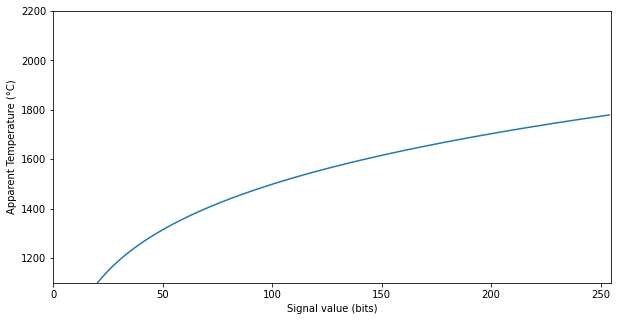

In [ ]:
'''
This cell is only for visualization of the signal vs temperature relationship. 
After completing the temp_app_signal() function, run this cell to see the plot.
'''

dl = np.arange(1,255)
fig=plt.figure(figsize=(10, 5))

plt.plot(dl, temp_app_signal(dl))
plt.ylabel('Apparent Temperature (°C)')
plt.xlabel('Signal value (bits)')
plt.ylim(1100,2200)
plt.xlim(0,255)

length: 0.23mm
width: 0.10mm
area: 0.0024mm^2


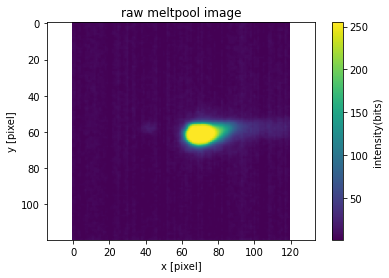

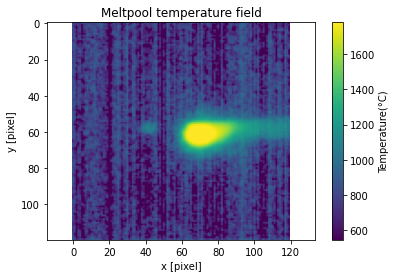

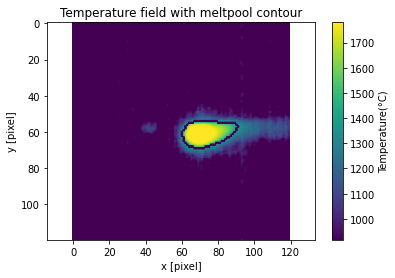

In [ ]:
meltpool_calc(1320)

## Question 2

**Possible causes for the dimensional differences between the Rosenthal model and the actual measurements:**
- Errors in the measurement instruments and temperature interpretation function.
- Powderbed is made of metal powders with a stacking factor which lowers the density for heat dissipation.
- Energy transfer from the laser heat source to the metal powder and molten metal has a lower efficiency.
- There is an inert laminar gas flow on the powder bed surface which effects the heat dissipation. 
- Laser radiates on the powderbed with an inclination angle which distorts the shape of the beam`s projection and affects energy distribution.
- Rosenthal model assumes a infinite plate, however LPBF would better be represented with a semi-finite model since layers are discreate and powder/solid ratio changes.
- As the process continues, heat accumulates in the powdee bed and printed solid material. This changes the shape of the meltpool. Initial temperature should be adjusted accordingly.